## 1、模型的输入

In [57]:
import pandas as pd
input_file='E://learnFile//chapter9//demo//data/moment.csv'
data=pd.read_csv(input_file,encoding='gbk')#如果.csv文件不是utf-8的，也就是报错那里出现utf-8字眼，考虑一下设置encoding='gbk'
data.head()

,类别,序号,R通道一阶矩,G通道一阶矩,B通道一阶矩,R通道二阶矩,G通道二阶矩,B通道二阶矩,R通道三阶矩,G通道三阶矩,B通道三阶矩
0,1,1,0.582823,0.543774,0.252829,0.014192,0.016144,0.041075,-0.012643,-0.016090,-0.041536
1,1,10,0.641660,0.570657,0.213728,0.015439,0.011178,0.013708,0.009727,-0.003724,-0.003779
2,1,11,0.603684,0.576719,0.282254,0.008659,0.007075,0.012204,-0.004695,-0.002571,-0.009451
3,1,12,0.589706,0.593743,0.252242,0.007908,0.005941,0.010568,0.003303,-0.003417,-0.005273
4,1,13,0.591096,0.592093,0.253595,0.007448,0.006495,0.012152,0.000496,-0.002236,-0.005096


In [58]:
data['类别'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [59]:
#先将DataFrame类型的数据转换为矩阵，然后打乱数据，截止80%的数据作为训练集，剩下的作为测试集
data=data.as_matrix()
from random import shuffle
shuffle(data)
train=data[:int(0.8*len(data)),:]
test=data[int(0.8*len(data)):,:]

In [60]:
#构造特征和标签
x_train=train[:,2:]*15
y_train=train[:,0].astype(int)
x_test=test[:,2:]*15
y_test=test[:,0].astype(int)


In [61]:
#导入模型相关的函数，建立并且训练模型
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)
import pickle#保存模型与读取模型
pickle.dump(model,open('svm.model','wb'))
model=pickle.load(open('svm.model','rb'))

===============训练集混淆矩阵跟准确率==================


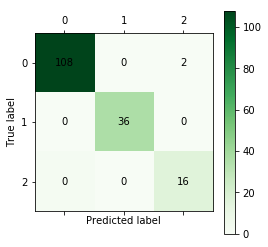

准确率: 0.987654320988
===============测试集混淆矩阵跟准确率==================


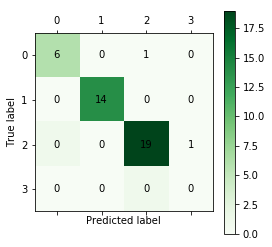

测试集: 0.951219512195


In [62]:
import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt
print("===============训练集混淆矩阵跟准确率==================")
cm_plot(y_train,model.predict(x_train)).show()
print("准确率:",model.score(x_train,y_train))

print("===============测试集混淆矩阵跟准确率==================")
cm_plot(y_test,model.predict(x_test)).show()
print("测试集:",model.score(x_test,y_test))

## 拓展思考

In [45]:
import pandas as pd
input_file='E://learnFile//chapter9/sikao.xls'
data=pd.read_excel(input_file)#如果.csv文件不是utf-8的，也就是报错那里出现utf-8字眼，考虑一下设置encoding='gbk'
data.head()

,SO2,NO,NO2,NOx,PM10,PM2-5,空气等级
0,0.031,0.0,0.046,0.047,0.085,0.058,I
1,0.022,0.0,0.053,0.053,0.070,0.048,II
2,0.017,0.0,0.029,0.029,0.057,0.040,I
3,0.026,0.0,0.026,0.026,0.049,0.034,I
4,0.018,0.0,0.027,0.027,0.051,0.035,I


In [46]:
tmp=data['空气等级'].unique()
tmp

array(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII'], dtype=object)

In [47]:
tmp[0]

'I'

In [48]:
for i in range(len(tmp)):
    data['空气等级']=data['空气等级'].replace(tmp[i],i+1)

In [49]:
data.head()

,SO2,NO,NO2,NOx,PM10,PM2-5,空气等级
0,0.031,0.0,0.046,0.047,0.085,0.058,1
1,0.022,0.0,0.053,0.053,0.070,0.048,2
2,0.017,0.0,0.029,0.029,0.057,0.040,1
3,0.026,0.0,0.026,0.026,0.049,0.034,1
4,0.018,0.0,0.027,0.027,0.051,0.035,1


In [50]:
from random import shuffle
data=data.as_matrix()
shuffle(data)
train=data[:int(len(data)*0.8),:]
test=data[int(len(data)*0.8):,:]

In [51]:
train.shape

(256, 7)

===============训练集混淆矩阵跟准确率==================


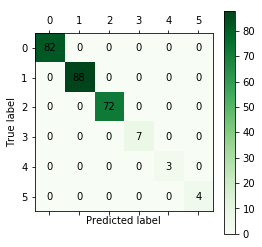

准确率: 1.0
===============测试集混淆矩阵跟准确率==================


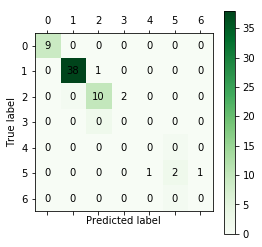

测试集: 0.921875


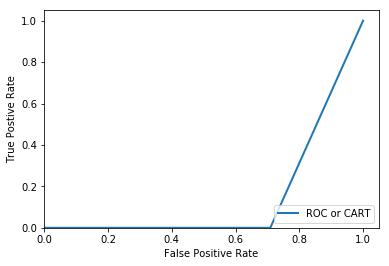

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(train[:,:6],train[:,6])

import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt
print("===============训练集混淆矩阵跟准确率==================")
cm_plot(train[:,6],tree.predict(train[:,:6])).show()
print("准确率:",tree.score(train[:,:6],train[:,6]))

print("===============测试集混淆矩阵跟准确率==================")
cm_plot(test[:,6],tree.predict(test[:,:6])).show()
print("测试集:",tree.score(test[:,:6],test[:,6]))

from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=roc_curve(test[:,6],tree.predict_proba(test[:,:6])[:,1],pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC or CART')
plt.xlabel("False Positive Rate")
plt.ylabel("True Postive Rate")
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()